# Simulation and Analysis of Game of Life

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

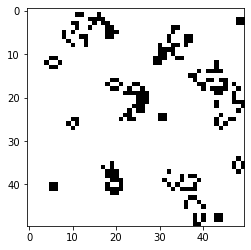

In [7]:
# Function to initialize the grid with random values
def random_grid(size):
    return np.random.choice([0, 1], size * size, p=[0.5, 0.5]).reshape(size, size)

# Function to update the grid according to Conway's rules
def update_grid(grid):
    new_grid = grid.copy()
    size = grid.shape[0]
    
    for i in range(size):
        for j in range(size):
            # Count the number of alive neighbors
            neighbors = grid[i-1:i+2, j-1:j+2]
            num_alive = np.sum(neighbors) - grid[i, j]
            
            # Apply Conway's rules
            if grid[i, j] == 1:
                if num_alive < 2 or num_alive > 3:
                    new_grid[i, j] = 0
            else:
                if num_alive == 3:
                    new_grid[i, j] = 1

    return new_grid

# Function to update the animation
def update(frameNum, img, grid, size):
    new_grid = update_grid(grid)
    img.set_data(new_grid)
    grid[:] = new_grid
    return img

# Set the grid size and create the initial grid
size = 50
grid = random_grid(size)

# Create the figure and axis for the animation
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='none', cmap='binary')

# Create an animation
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, size),
                              frames=50, interval=100, save_count=50)

# Save the animation to a GIF file
ani.save('test_bitmap.gif', writer='pillow', fps=10)

plt.show()

# Display the animation in the Jupyter Notebook
HTML(ani.to_jshtml())

## Initial state library

In [ ]:
# Below are a bunch of initial states that one can pick from
beacon = [[1, 1, 0, 0],
          [1, 1, 0, 0],
          [0, 0, 1, 1],
          [0, 0, 1, 1]]
universe[1:5, 1:5] = beacon

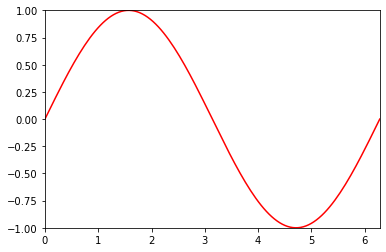

In [4]:
# animation 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create a figure and axis
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'r-')

# Function to initialize the plot
def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

# Function to update the plot in each frame
def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

# Create an animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)

# Display the animation in the Jupyter Notebook
HTML(ani.to_jshtml())